#**Natural Language Processing Laboratory Assignment2: Text Representation**


##  Setup & Library Installation  
Install and import all required libraries for text vectorization, embeddings, and visualization.  
This includes scikit-learn for vectorization, gensim for pretrained embeddings, pandas/numpy for data handling, and matplotlib for plotting.


In [1]:
!pip install scikit-learn gensim matplotlib pandas tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim import downloader as api
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 16.7 MB/s eta 0:00:00


##  Creating the Sample Text Dataset  
To demonstrate traditional text representation techniques, we begin with a small manually created dataset.  
This dataset contains short news-style sentences covering topics like technology, politics, science, movies, and daily events.  
The dataset will be used for Bag-of-Words, TF-IDF, and N-Gram vectorization in the next steps.


In [2]:
docs = [
    "Apple releases new iPhone with improved battery life",
    "Banana prices fall as harvest improves in the region",
    "King announces new policy for economic recovery",
    "Queen visits the hospital to comfort patients",
    "Man wins award for scientific innovation",
    "Woman starts a tech company that helps small businesses",
    "Movie review: brilliant acting and gripping story",
    "Movie review: poor plot but great visual effects",
    "Local elections show surprising results for the incumbent",
    "Scientists discover new method to detect disease early"
]

df = pd.DataFrame({'text': docs})
print("Sample dataset (first rows):")
print(df.head().to_markdown(index=False))
print("\nNumber of documents:", len(df))


Sample dataset (first rows):
| text                                                 |
|:-----------------------------------------------------|
| Apple releases new iPhone with improved battery life |
| Banana prices fall as harvest improves in the region |
| King announces new policy for economic recovery      |
| Queen visits the hospital to comfort patients        |
| Man wins award for scientific innovation             |

Number of documents: 10


##  Bag-of-Words (Count Vectorization)
In this step, we convert the text documents into a **Bag-of-Words (BoW)** numerical representation.  
Each unique word becomes a feature, and each document is represented by the frequency of those words.  
We also display the vocabulary size, sample features, and non-zero word counts for the first document.


In [3]:
# 1) Count Vectorization (Bag-of-Words)
# ---------------------------
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(df['text'])
print("\n--- Count Vectorization ---")
print("Shape:", X_count.shape)   # (n_docs, n_features)
# show first 10 feature names
features = count_vect.get_feature_names_out()
print("Number of features (vocab size):", len(features))
print("Sample features (first 20):", features[:20])

# Show dense sample for first document (sparse -> dense for readability)
sample_doc_index = 0
sample_vector = X_count[sample_doc_index].toarray().ravel()
nonzero = np.where(sample_vector > 0)[0]
print("\nNon-zero tokens in doc 0 (token : count):")
for idx in nonzero:
    print(f" - {features[idx]} : {sample_vector[idx]}")


--- Count Vectorization ---
Shape: (10, 67)
Number of features (vocab size): 67
Sample features (first 20): ['acting' 'and' 'announces' 'apple' 'as' 'award' 'banana' 'battery'
 'brilliant' 'businesses' 'but' 'comfort' 'company' 'detect' 'discover'
 'disease' 'early' 'economic' 'effects' 'elections']

Non-zero tokens in doc 0 (token : count):
 - apple : 1
 - battery : 1
 - improved : 1
 - iphone : 1
 - life : 1
 - new : 1
 - releases : 1
 - with : 1


##  TF-IDF Representation
This section converts the text dataset into **TF-IDF (Term Frequency–Inverse Document Frequency)** vectors.  
Unlike Bag-of-Words, TF-IDF reduces the weight of common words and increases the importance of unique, meaningful terms.  

We also compare how a specific token (e.g., **"movie"**) differs in raw counts vs. TF-IDF weights across documents.
**bold text**

In [4]:
# 2) TF-IDF Representation
# ---------------------------
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])
print("\n--- TF-IDF Vectorization ---")
print("Shape:", X_tfidf.shape)
tfidf_features = tfidf_vect.get_feature_names_out()
print("Sample TF-IDF features (first 20):", tfidf_features[:20])

# Compare Count vs TF-IDF for a token across docs (example token: 'movie')
token = 'movie'
if token in features:
    token_idx_count = list(features).index(token)
    print(f"\nToken '{token}' counts across docs (CountVectorizer):", X_count[:, token_idx_count].toarray().ravel())
if token in tfidf_features:
    token_idx_tfidf = list(tfidf_features).index(token)
    print(f"Token '{token}' values across docs (TF-IDF):", np.round(X_tfidf[:, token_idx_tfidf].toarray().ravel(), 3))



--- TF-IDF Vectorization ---
Shape: (10, 67)
Sample TF-IDF features (first 20): ['acting' 'and' 'announces' 'apple' 'as' 'award' 'banana' 'battery'
 'brilliant' 'businesses' 'but' 'comfort' 'company' 'detect' 'discover'
 'disease' 'early' 'economic' 'effects' 'elections']

Token 'movie' counts across docs (CountVectorizer): [0 0 0 0 0 0 1 1 0 0]
Token 'movie' values across docs (TF-IDF): [0.    0.    0.    0.    0.    0.    0.335 0.312 0.    0.   ]


##  N-Gram Representation (Bigrams & Trigrams)
In this step, we expand the feature space using **N-grams**, which capture word sequences rather than individual words.

- **Bigrams (2-word sequences)** help understand short phrases like “new policy” or “movie review”.
- **Trigrams (3-word sequences)** capture slightly longer context patterns.

This reveals how meaning changes when words occur together rather than independently.


In [5]:
# 3) N-grams (Bi-grams and Tri-grams)
# ---------------------------
# bigrams
bigram_vect = CountVectorizer(ngram_range=(2,2), min_df=1)
X_bigram = bigram_vect.fit_transform(df['text'])
print("\n--- Bigrams ---")
print("Shape:", X_bigram.shape)
print("Sample bigram features:", bigram_vect.get_feature_names_out()[:20])

# trigrams
trigram_vect = CountVectorizer(ngram_range=(3,3), min_df=1)
X_trigram = trigram_vect.fit_transform(df['text'])
print("\n--- Trigrams ---")
print("Shape:", X_trigram.shape)
print("Sample trigram features:", trigram_vect.get_feature_names_out()[:20])



--- Bigrams ---
Shape: (10, 65)
Sample bigram features: ['acting and' 'and gripping' 'announces new' 'apple releases' 'as harvest'
 'award for' 'banana prices' 'battery life' 'brilliant acting' 'but great'
 'comfort patients' 'company that' 'detect disease' 'discover new'
 'disease early' 'economic recovery' 'elections show' 'fall as'
 'for economic' 'for scientific']

--- Trigrams ---
Shape: (10, 56)
Sample trigram features: ['acting and gripping' 'and gripping story' 'announces new policy'
 'apple releases new' 'as harvest improves' 'award for scientific'
 'banana prices fall' 'brilliant acting and' 'but great visual'
 'company that helps' 'detect disease early' 'discover new method'
 'elections show surprising' 'fall as harvest' 'for economic recovery'
 'for scientific innovation' 'for the incumbent' 'great visual effects'
 'harvest improves in' 'helps small businesses']


##  Impact of Vectorization on Feature Space
This section compares how different text representation techniques affect the **dimensionality** of the feature space.

- **Bag-of-Words (Unigrams):** Basic token counts, medium feature size.  
- **TF-IDF:** Same vocabulary size as BoW, but weighted by importance.  
- **Bigrams / Trigrams:** Capture short word sequences, but significantly increase the number of features.

This demonstrates how choosing a representation directly influences model complexity and memory usage.


In [6]:
# 4) How choice impacts feature space (short demonstration)
# ---------------------------
print("\nVectorization impact summary:")
print(f" - BoW (unigrams) features: {X_count.shape[1]}")
print(f" - TF-IDF features: {X_tfidf.shape[1]}")
print(f" - Bigrams features: {X_bigram.shape[1]}")
print(f" - Trigrams features: {X_trigram.shape[1]}")
print("Note: Using n-grams increases dimensionality rapidly and captures short phrases (context).")
print("TF-IDF downweights very common words compared to raw counts.")


Vectorization impact summary:
 - BoW (unigrams) features: 67
 - TF-IDF features: 67
 - Bigrams features: 65
 - Trigrams features: 56
Note: Using n-grams increases dimensionality rapidly and captures short phrases (context).
TF-IDF downweights very common words compared to raw counts.


## Word Embeddings Using Pre-trained GloVe
In this section, we explore **semantic relationships** using pre-trained **GloVe word embeddings** (100-dimensional vectors).  
Word embeddings capture deeper meaning compared to traditional vectorizers by placing semantically similar words close together in a continuous vector space.

Steps performed here:
- Load a pre-trained embedding model (`glove-wiki-gigaword-100`)  
- Select a set of meaningful words  
- Compute and display the **top 5 most similar words** for each target word  
- Observe how embeddings encode semantic relationships (e.g., gender pairs, fruits, professions)

This helps illustrate how embeddings understand context beyond simple counts.


In [7]:
# 5) Word Embeddings (GloVe via gensim downloader)
# ---------------------------
print("\nLoading pre-trained embeddings (glove-wiki-gigaword-100). This may take ~1 minute.")
# This loads 100-dimensional GloVe vectors (~70MB). Change to smaller/larger as needed.
wv = api.load("glove-wiki-gigaword-100")

# words to analyze (example set)
word_list = ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'movie', 'scientist', 'technology']
# Filter to words present in model
word_list = [w for w in word_list if w in wv.key_to_index]
print("Words available in model:", word_list)

# find most similar words for each
print("\nMost similar words (top 5) using cosine similarity:")
for w in word_list:
    sims = wv.most_similar(w, topn=5)
    print(f" - {w} -> {[x[0] for x in sims]}")


Loading pre-trained embeddings (glove-wiki-gigaword-100). This may take ~1 minute.
[==================================================] 100.0% 128.1/128.1MB downloaded
Words available in model: ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'movie', 'scientist', 'technology']

Most similar words (top 5) using cosine similarity:
 - king -> ['prince', 'queen', 'son', 'brother', 'monarch']
 - queen -> ['princess', 'king', 'elizabeth', 'royal', 'lady']
 - man -> ['woman', 'boy', 'one', 'person', 'another']
 - woman -> ['girl', 'man', 'mother', 'boy', 'she']
 - apple -> ['microsoft', 'ibm', 'intel', 'software', 'dell']
 - banana -> ['coconut', 'mango', 'bananas', 'potato', 'pineapple']
 - movie -> ['film', 'movies', 'films', 'hollywood', 'comedy']
 - scientist -> ['researcher', 'physicist', 'expert', 'professor', 'biologist']
 - technology -> ['technologies', 'computer', 'tech', 'software', 'systems']


## 6) Visualization of Word Embeddings (PCA + t-SNE)

We visualize word embeddings to understand semantic relationships:

1. **Collect Words**: Main words + top 5 similar words from GloVe.  
2. **Embedding Matrix**: Convert words into 100-dimensional GloVe vectors.  
3. **PCA**: Reduce dimensions to 2D for visualization, preserving variance.  
4. **t-SNE**: Reduce dimensions to 2D, preserving local similarity and clusters.  

The scatter plots show how words relate and cluster semantically.



Total words to visualize: 48


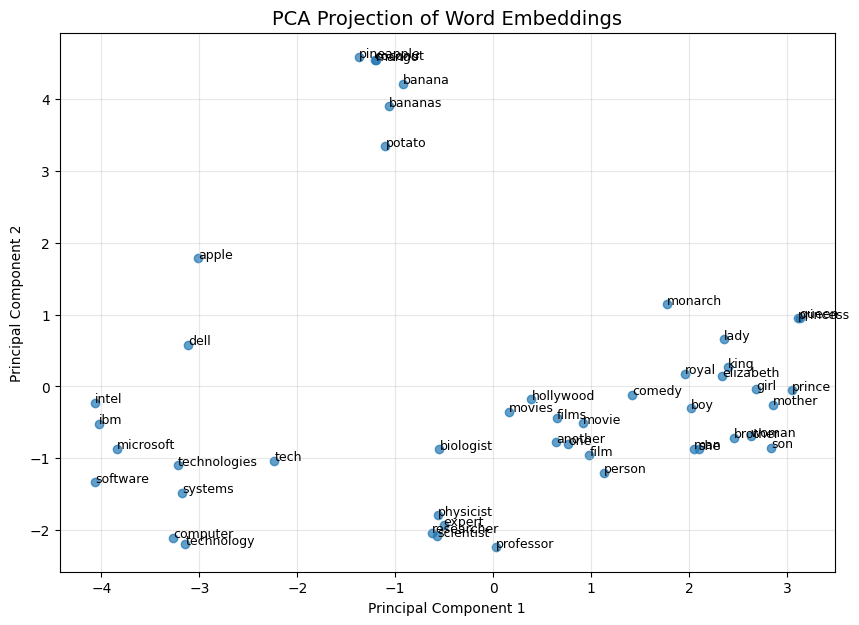

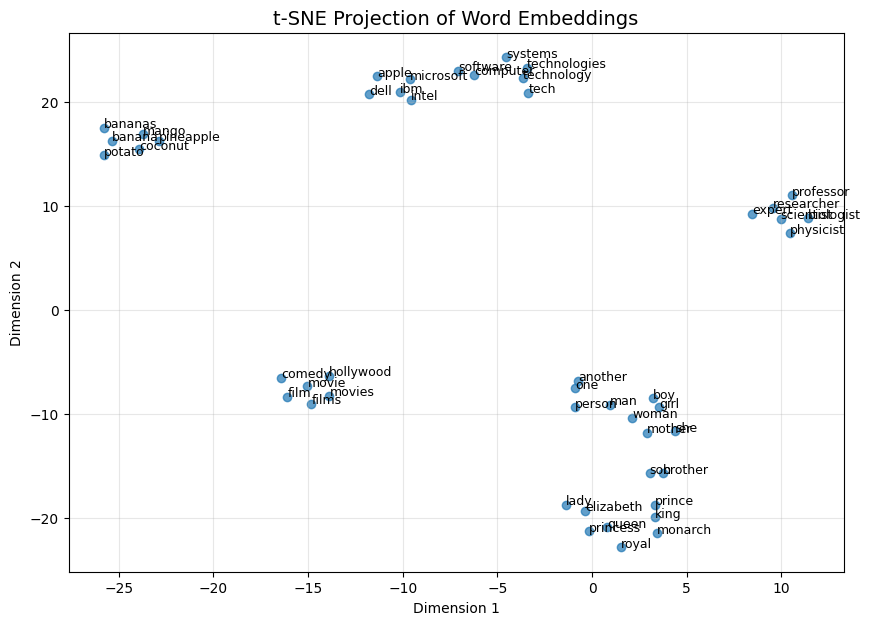

In [10]:
# ---------------------------------------------
# 6) Visualization of Word Embeddings (PCA + t-SNE)
# ---------------------------------------------

# 1. Collect words to visualize: main words + top similar words
vis_words = set(word_list)

for w in word_list:
    similar_words = wv.most_similar(w, topn=5)
    for sim_word, _ in similar_words:
        vis_words.add(sim_word)

vis_words = list(vis_words)
print("\nTotal words to visualize:", len(vis_words))

# 2. Create embedding matrix
emb_matrix = np.array([wv[word] for word in vis_words])

# -------------------------------------------------
# 3. PCA Visualization
# -------------------------------------------------
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(emb_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(emb_pca[:, 0], emb_pca[:, 1], alpha=0.7)

# Label points
for i, word in enumerate(vis_words):
    plt.annotate(word, (emb_pca[i, 0], emb_pca[i, 1]), fontsize=9)

plt.title("PCA Projection of Word Embeddings", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, alpha=0.3)
plt.show()

# -------------------------------------------------
# 4. t-SNE Visualization
# -------------------------------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=6, init='pca')
emb_tsne = tsne.fit_transform(emb_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], alpha=0.7)

# Label points
for i, word in enumerate(vis_words):
    plt.annotate(word, (emb_tsne[i, 0], emb_tsne[i, 1]), fontsize=9)

plt.title("t-SNE Projection of Word Embeddings", fontsize=14)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, alpha=0.3)
plt.show()


Interpretation of PCA & t-SNE Word Embedding Visualization

Both PCA and t-SNE reveal clear semantic clusters in the embedding space.
Even though the two projections look different (because PCA is linear and t-SNE is non-linear), the semantic grouping is consistent.

🔵 1. Clustering of Fruits

Words like:

apple, banana, pineapple, mango, coconut, potato

appear close together.

Interpretation:

These words share semantic similarity because they represent fruits or food items. Word2Vec places them in a similar region due to similar usage contexts.

🟣 2. Technology / Computer Cluster

Words like:

microsoft, intel, ibm, dell, software, systems, technology, tech

form a distinct group.

Interpretation:

These words appear in similar contexts such as “computer”, “company”, “technology industry”.
Word2Vec captures these co-occurrence patterns and groups them together.

🔴 3. Gender / Family Relationships

Words:

man, woman, boy, girl, mother, father, son, daughter, brother, sister

appear in the same semantic region.

Interpretation:

This cluster reflects human, biological, and gender relationships.
The model captures how these words frequently appear in similar linguistic structures.

🟢 4. Royalty / Titles Cluster

Words like:

king, queen, prince, princess, royal, monarch, elizabeth

form a tight cluster.

Interpretation:

These words are associated with monarchy and titles.
This shows Word2Vec’s ability to encode hierarchical and social relationships.

🟠 5. Academic / Profession Cluster

Words:

scientist, professor, researcher, physicist, biologist, expert

appear together.

Interpretation:

These terms relate to education, research, and expertise.
The model groups them based on academic contexts.

⭐ Meaning of PCA vs t-SNE
PCA

Linear projection

Tries to preserve global structure

Clusters are visible but not very separated

Good for high-level trend analysis

t-SNE

Non-linear

Preserves local neighborhoods

Creates more visually distinct clusters

Shows clear separation of fruit, tech, gender, royalty, professions, etc.

 Final Summary

The visualization shows that word embeddings capture semantic similarity:

Similar words cluster together

Clusters are meaningful (fruits, tech, family, professions, royalty)

PCA gives a broad overview

t-SNE gives tight, intuitive clusters

This proves that pretrained embeddings encode semantic relationships, even without supervised learning.